In [7]:
#Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Load and read the HR dataset

In [6]:
df = pd.read_csv('/content/HRDataset_v14.csv')

 Display the first few rows of the dataset

In [9]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,01-03-2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,02-01-2016,0,2


 Display the column names of the dataset

In [10]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'DateofHire',
       'DateofHire.1', 'TermReason', 'EmploymentStatus', 'Department',
       'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences'],
      dtype='object')

Get the dimensions (number of rows and columns) of the dataset

In [11]:
df.shape

(311, 35)

Display information about the DataFrame including column data types, non-null counts, and memory usage

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

**Handling Missing Values**

In [13]:
# Sorting the DataFrame by a logical order (e.g., by employee or date)
df.sort_values(by=['Employee_Name'], inplace=True)

# backward fill (bfill) to fill missing 'ManagerID' values
df['ManagerID'].fillna(method='bfill', inplace=True)

# Display the updated DataFrame
#print(df.head())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 0 to 310
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

Correct the DateofHire' and LastPerformanceReview_Date column to a consistent datetime format:

In [ ]:
# Convert the 'DateofHire' and 'LastPerformanceReview_Date' columns to a consistent datetime format
df['DateofHire'] = pd.to_datetime(df['DateofHire'], format='%m-%d-%Y', errors='coerce')
df['LastPerformanceReview_Date'] = pd.to_datetime(df['LastPerformanceReview_Date'], format='%m-%d-%Y', errors='coerce')

# Display the updated 'DateofHire' and 'LastPerformanceReview_Date' columns
print(df[['DateofHire', 'LastPerformanceReview_Date']])


    DateofHire LastPerformanceReview_Date
0   2011-07-05                        NaT
1          NaT                        NaT
2   2011-07-05                        NaT
3   2008-01-07                 2019-01-03
4   2011-07-11                 2016-02-01
..         ...                        ...
306 2014-07-07                        NaT
307 2008-09-02                 2015-09-02
308 2010-04-10                        NaT
309        NaT                 2019-02-01
310        NaT                        NaT

[311 rows x 2 columns]


In [ ]:
# Select the columns of interest
columns_of_interest = ['Salary', 'SpecialProjectsCount', 'PerfScoreID', 'Absences','EngagementSurvey','EmpSatisfaction','GenderID']

# Generate descriptive statistics for the selected columns
descriptive_stats = df[columns_of_interest].describe()

# Display the descriptive statistics
print(descriptive_stats)

              Salary  SpecialProjectsCount  PerfScoreID    Absences  \
count     311.000000            311.000000   311.000000  311.000000   
mean    69020.684887              1.218650     2.977492   10.237942   
std     25156.636930              2.349421     0.587072    5.852596   
min     45046.000000              0.000000     1.000000    1.000000   
25%     55501.500000              0.000000     3.000000    5.000000   
50%     62810.000000              0.000000     3.000000   10.000000   
75%     72036.000000              0.000000     3.000000   15.000000   
max    250000.000000              8.000000     4.000000   20.000000   

       EngagementSurvey  EmpSatisfaction    GenderID  
count        311.000000       311.000000  311.000000  
mean           4.110000         3.890675    0.434084  
std            0.789938         0.909241    0.496435  
min            1.120000         1.000000    0.000000  
25%            3.690000         3.000000    0.000000  
50%            4.280000       

In [ ]:
# List of columns to remove outliers from
columns_to_remove_outliers = ['Salary', 'SpecialProjectsCount', 'Absences', 'EngagementSurvey']

# Create a copy of the original DataFrame
df_no_outliers = df.copy()

# Iterate over each column and remove outliers
for column in columns_to_remove_outliers:
    Q1 = df_no_outliers[column].quantile(0.25)
    Q3 = df_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data to remove outliers for the current column
    df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

# Display the resulting DataFrame without outliers
print(df_no_outliers)


**Correlation**


In [ ]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'Zip', 'ManagerID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30', 'Absences'],
      dtype='object')

In [ ]:
categorical_features = df.select_dtypes(include=[object])
categorical_features.columns

Index(['Employee_Name', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'DateofHire', 'DateofHire.1',
       'TermReason', 'EmploymentStatus', 'Department', 'ManagerName',
       'RecruitmentSource', 'PerformanceScore', 'LastPerformanceReview_Date'],
      dtype='object')

In [ ]:
correlation = numeric_features.corr()
print(correlation['Salary'].sort_values(ascending = False), '\n')



Salary                    1.000000
SpecialProjectsCount      0.508333
PerfScoreID               0.130903
Absences                  0.082382
EngagementSurvey          0.064966
EmpSatisfaction           0.062718
GenderID                  0.056097
FromDiversityJobFairID    0.041248
MarriedID                 0.026165
Zip                      -0.037242
DaysLateLast30           -0.069443
MaritalStatusID          -0.070291
Termd                    -0.093994
EmpStatusID              -0.110912
EmpID                    -0.115319
PositionID               -0.130563
ManagerID                -0.424399
DeptID                   -0.448132
Name: Salary, dtype: float64 



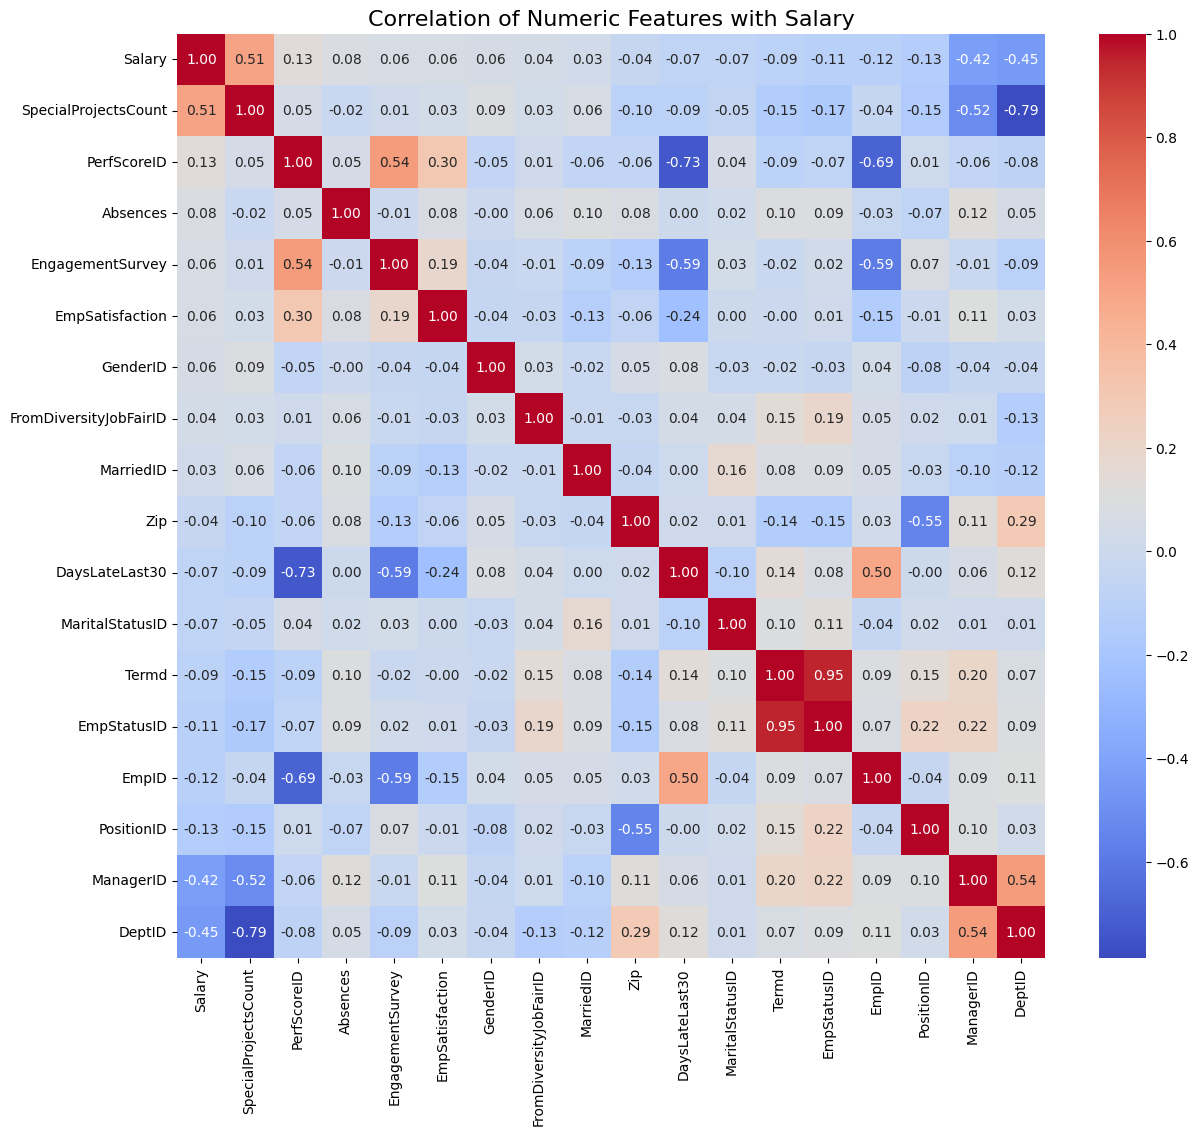

In [ ]:
# Calculate the correlation matrix
correlation = numeric_features.corr()

# Sort the correlation values for the 'Salary' column in descending order
sorted_correlation = correlation['Salary'].sort_values(ascending=False)

# Select only the numeric features that are strongly correlated with 'Salary'
strongly_correlated_features = sorted_correlation.index

# Create a subset of the correlation matrix with the strongly correlated features
subset_correlation = correlation.loc[strongly_correlated_features, strongly_correlated_features]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(14, 12))

# Set the title for the plot
ax.set_title('Correlation of Numeric Features with Salary', y=1, size=16)

# Create a heatmap plot for the subset of the correlation matrix
sns.heatmap(subset_correlation, cmap='coolwarm', annot=True, fmt=".2f", ax=ax)

# Show the plot
plt.show()




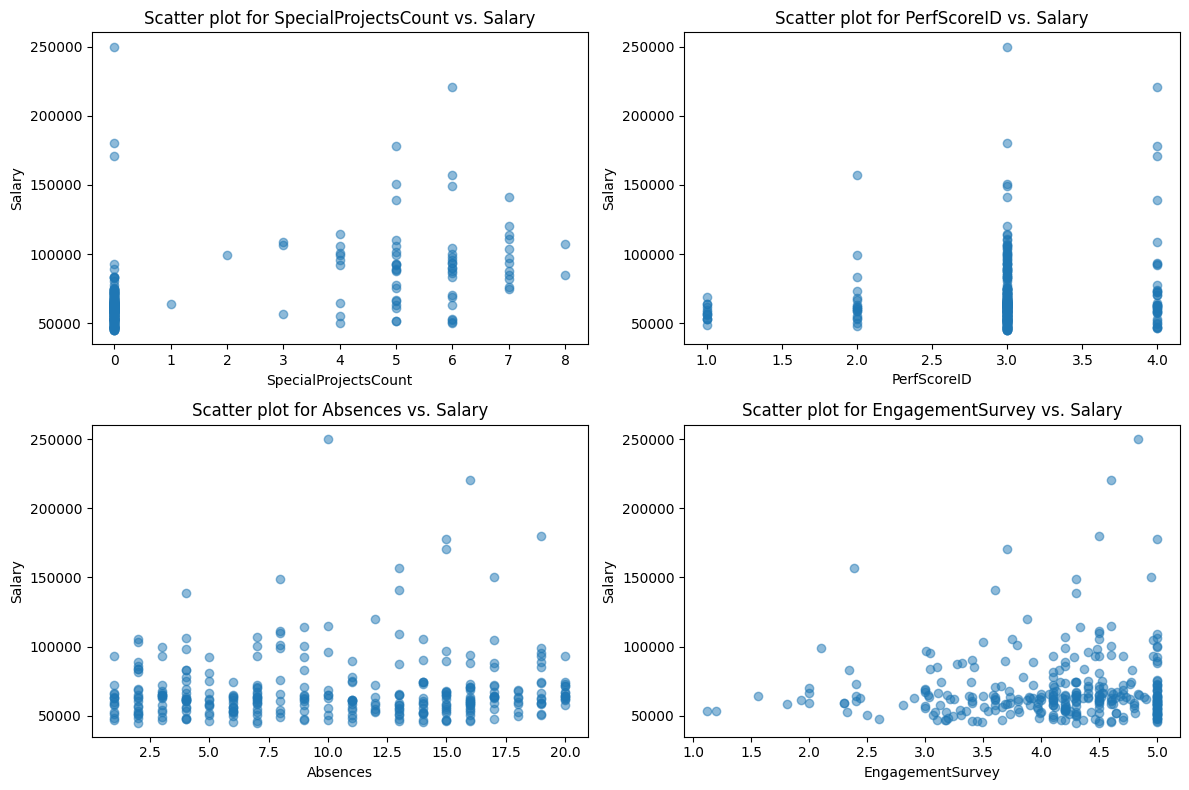

In [ ]:
# Sort the correlation values for the 'Salary' column in descending order, excluding 'Salary' itself
sorted_correlation = correlation['Salary'].drop('Salary').sort_values(ascending=False)

# Select the top four numeric features with the strongest positive correlations
top_positive_corr_features = sorted_correlation.head(4).index

# Create individual scatter plots for the top 4 positive correlation features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, feature in enumerate(top_positive_corr_features):
    ax = axes[i // 2, i % 2]  # Calculate subplot index
    ax.scatter(df[feature], df['Salary'], alpha=0.5)
    ax.set_xlabel(feature)
    ax.set_ylabel('Salary')
    ax.set_title(f'Scatter plot for {feature} vs. Salary')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()




**Employee analysis**

In [ ]:
gender_distribution = df['Sex'].value_counts()
print('\nEmployee Distribution by Gender')
print(gender_distribution)



Employee Distribution by Gender
F     176
M     135
Name: Sex, dtype: int64


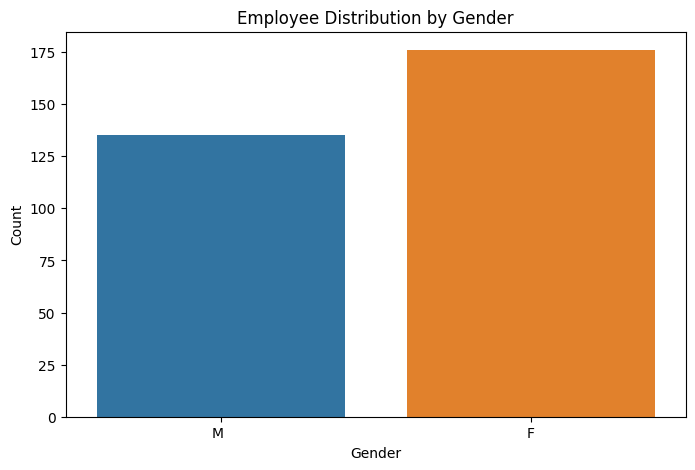

In [ ]:
# Create a countplot for Sex
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sex')  # You can choose your preferred color
plt.title('Employee Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
average_salary_by_sex = df.groupby('Sex')['Salary'].mean().reset_index()
average_salary_by_sex.columns = ['Sex', 'Average Salary']

print('Average Salary by Sex\n')
print(average_salary_by_sex)

Average Salary by Sex

  Sex  Average Salary
0   F    67786.727273
1  M     70629.400000


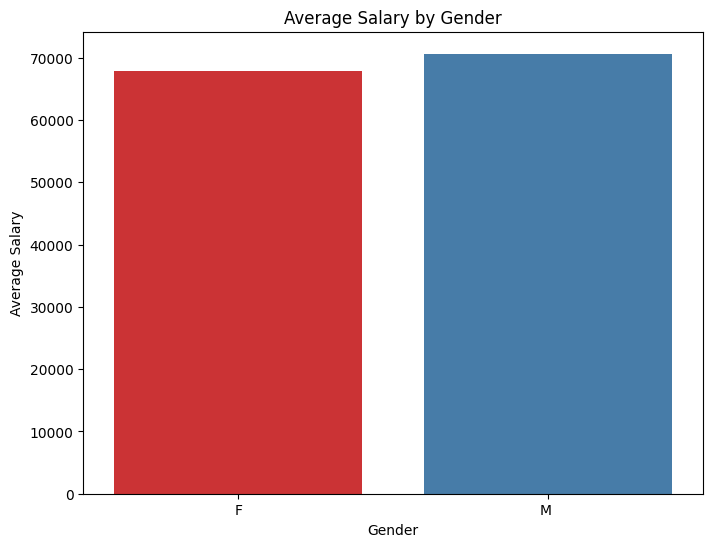

In [ ]:
# Group the data by gender and calculate the average salary for each group
gender_salary_avg = df.groupby('Sex')['Salary'].mean().reset_index()

# Create a grouped bar plot to compare the average salaries
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_salary_avg, x='Sex', y='Salary', palette='Set1')
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.show()

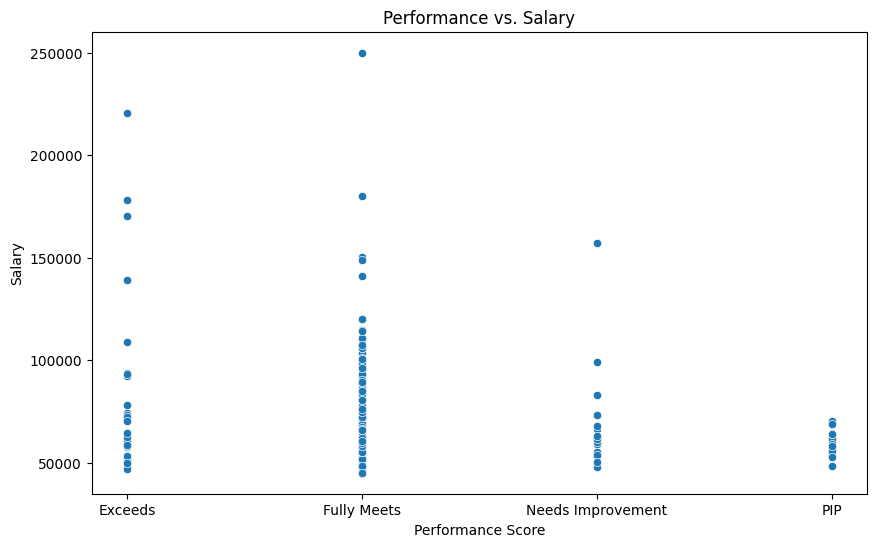

In [ ]:
# Create a scatter plot of performance vs. salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PerformanceScore', y='Salary')
plt.title('Performance vs. Salary')
plt.xlabel('Performance Score')
plt.ylabel('Salary')
plt.show()

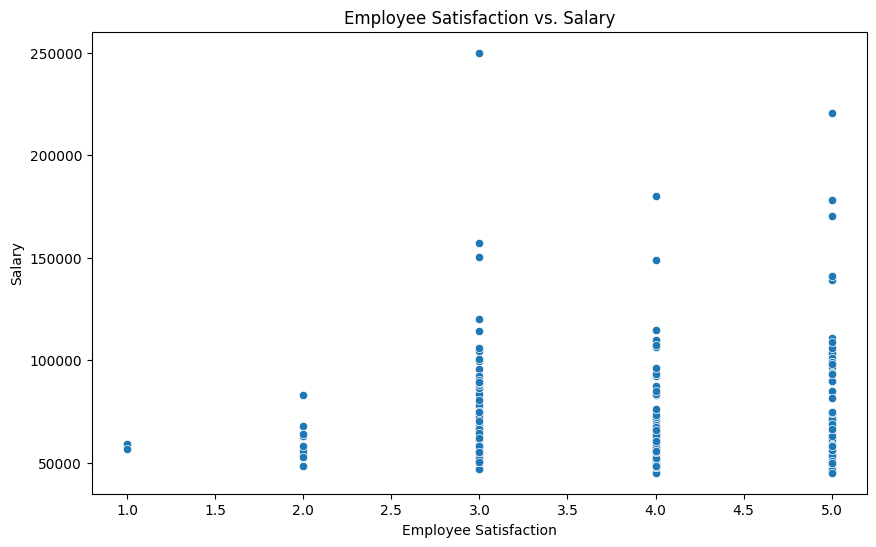

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='EmpSatisfaction', y='Salary')
plt.title('Employee Satisfaction vs. Salary')
plt.xlabel('Employee Satisfaction')
plt.ylabel('Salary')
plt.show()

In [ ]:
selected_columns = ['TermReason', 'PerformanceScore', 'Absences', 'Salary']
subset_df = df[selected_columns]
print(subset_df.describe())

         Absences         Salary
count  311.000000     311.000000
mean    10.237942   69020.684887
std      5.852596   25156.636930
min      1.000000   45046.000000
25%      5.000000   55501.500000
50%     10.000000   62810.000000
75%     15.000000   72036.000000
max     20.000000  250000.000000


In [ ]:
# Count of Unique Term Reasons:
term_reason_counts = subset_df['TermReason'].value_counts()
print('Unique Term Reasons:\n')
print(term_reason_counts)

Unique Term Reasons:

N/A-StillEmployed                   207
Another position                     20
unhappy                              14
more money                           11
career change                         9
hours                                 8
attendance                            7
return to school                      5
relocation out of area                5
no-call, no-show                      4
military                              4
retiring                              4
performance                           4
maternity leave - did not return      3
medical issues                        3
Learned that he is a gangster         1
Fatal attraction                      1
gross misconduct                      1
Name: TermReason, dtype: int64


In [ ]:
performance_score_counts = subset_df['PerformanceScore'].value_counts()
print(performance_score_counts)

Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: PerformanceScore, dtype: int64


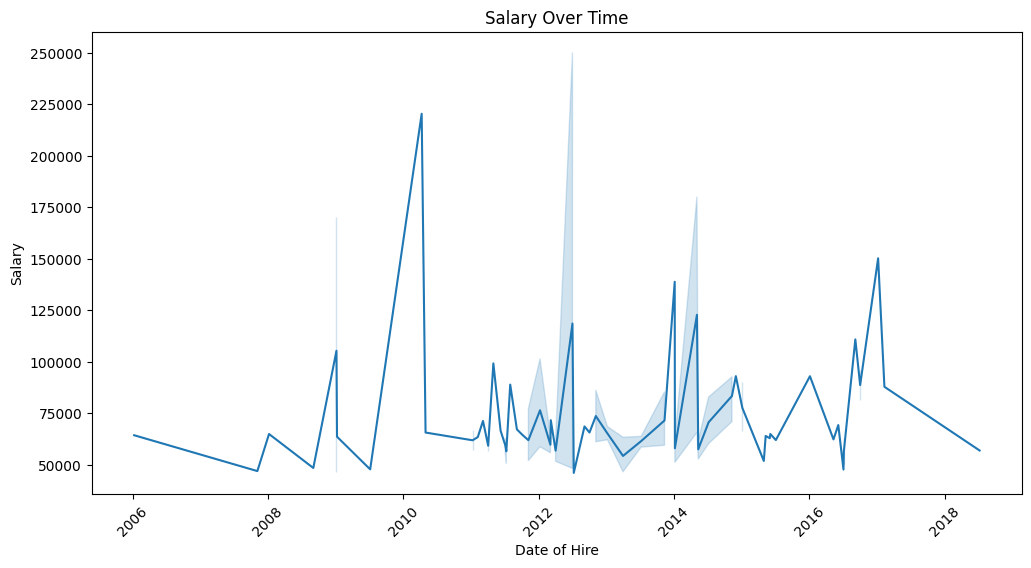

In [ ]:
df['DateofHire'] = pd.to_datetime(df['DateofHire'])

# Create a line plot of salary over time (date of hire)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='DateofHire', y='Salary')
plt.title('Salary Over Time')
plt.xlabel('Date of Hire')
plt.ylabel('Salary')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


In [ ]:
recruitment_source_by_sex = df.groupby(['RecruitmentSource', 'Sex'])['Employee_Name'].count().reset_index()
recruitment_source_by_sex.columns = ['Recruitment Source', 'Sex', 'Count']

# Sort by count in descending order
recruitment_source_by_sex = recruitment_source_by_sex.sort_values(by='Count', ascending=False)

print('\nRecruitment Source Distribution by Sex')
print(recruitment_source_by_sex)


Recruitment Source Distribution by Sex
         Recruitment Source Sex  Count
8                    Indeed   F     50
10                 LinkedIn   F     44
9                    Indeed  M      37
6             Google Search   F     33
11                 LinkedIn  M      32
5         Employee Referral  M      20
7             Google Search  M      16
0             CareerBuilder   F     16
2        Diversity Job Fair   F     15
3        Diversity Job Fair  M      14
4         Employee Referral   F     11
1             CareerBuilder  M       7
16                  Website  M       7
15                  Website   F      6
12  On-line Web application  M       1
13                    Other   F      1
14                    Other  M       1


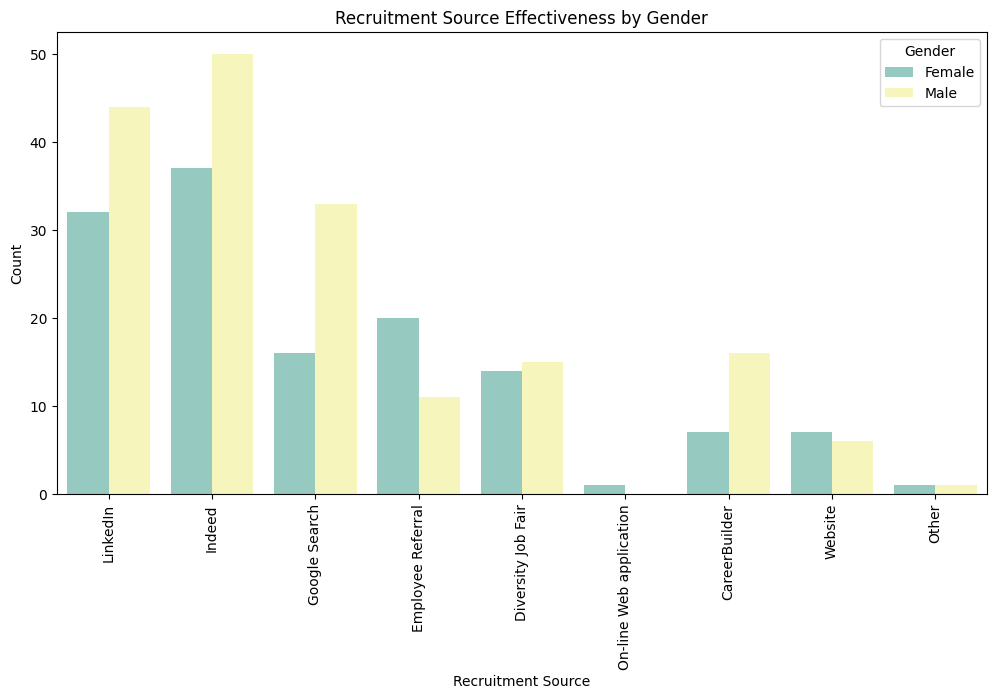

In [ ]:
# Create a countplot for recruitment sources differentiated by gender
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='RecruitmentSource', hue='Sex', palette='Set3')
plt.title('Recruitment Source Effectiveness by Gender')
plt.xlabel('Recruitment Source')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

In [ ]:
top_positions_male = df[df['Sex'] == 'M ']['Position'].value_counts().head(10)
top_positions_female = df[df['Sex'] == 'F']['Position'].value_counts().head(10)

print('Top 10 Positions Held by Males:')
print(top_positions_male)

print('\nTop 10 Positions Held by Females:')
print(top_positions_female)

Top 5 Positions Held by Males:
Production Technician I     54
Production Technician II    20
Area Sales Manager          15
Production Manager           8
Software Engineer            4
Data Analyst                 4
Network Engineer             3
Sr. Network Engineer         3
BI Developer                 3
IT Support                   3
Name: Position, dtype: int64

Top 5 Positions Held by Females:
Production Technician I     83
Production Technician II    37
Area Sales Manager          12
Production Manager           6
Software Engineer            6
IT Support                   5
Database Administrator       4
Administrative Assistant     3
Data Analyst                 3
Network Engineer             2
Name: Position, dtype: int64


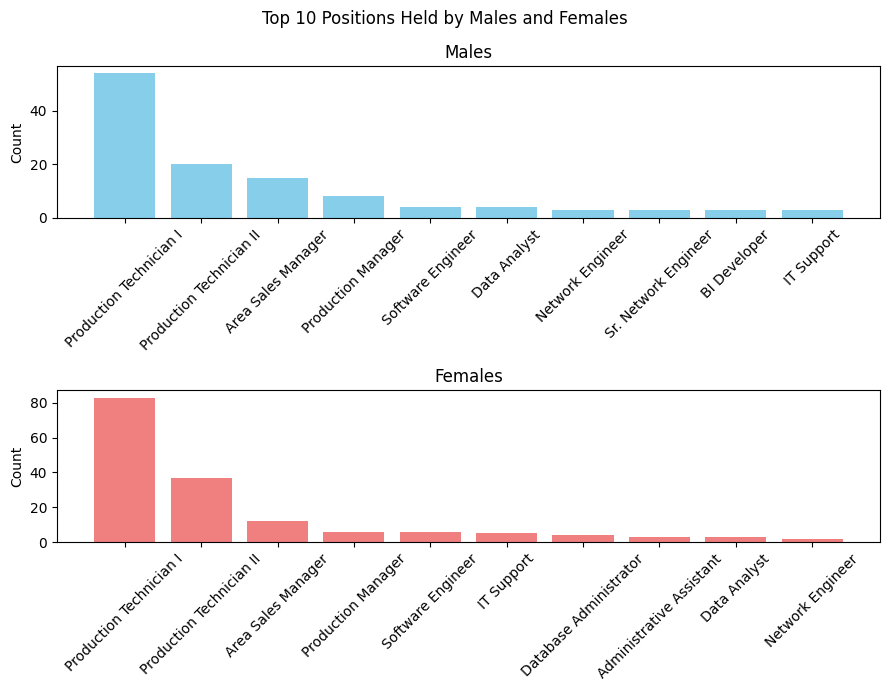

In [ ]:
# Create subplots for males and females
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 7))
fig.suptitle('Top 10 Positions Held by Males and Females')

# Plot for males
axes[0].bar(top_positions_male.index, top_positions_male.values, color='skyblue')
axes[0].set_ylabel('Count')
axes[0].set_title('Males')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot for females
axes[1].bar(top_positions_female.index, top_positions_female.values, color='lightcoral')
axes[1].set_ylabel('Count')
axes[1].set_title('Females')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

In [ ]:

# Group the data by ManagerName and count the number of employees
manager_employee_counts = df['ManagerName'].value_counts()

# Convert the result to a DataFrame for better handling (optional)
manager_employee_counts_df = pd.DataFrame({'ManagerName': manager_employee_counts.index, 'EmployeeCount': manager_employee_counts.values})

# Display the result
print(manager_employee_counts_df)

           ManagerName  EmployeeCount
0       Michael Albert             22
1       Kissy Sullivan             22
2         Elijiah Gray             22
3        Kelley Spirea             22
4       Brannon Miller             22
5        Ketsia Liebig             21
6        David Stanley             21
7             Amy Dunn             21
8       Webster Butler             21
9           Janet King             19
10          Simon Roup             17
11        Peter Monroe             14
12          John Smith             14
13       Lynn Daneault             13
14     Alex Sweetwater              9
15    Brian Champaigne              8
16  Brandon R. LeBlanc              7
17     Jennifer Zamora              7
18        Eric Dougall              4
19      Debra Houlihan              3
20  Board of Directors              2


In [ ]:
# Sort the DataFrame by 'EmpSatisfaction' in descending order and 'Absences' in ascending order
top_employees = df.sort_values(by=['EmpSatisfaction', 'Absences'], ascending=[False, True])

# Display the top employees based on EmpSatisfaction and Absences
print(top_employees[['Employee_Name', 'EmpSatisfaction', 'Absences']].head(10))

               Employee_Name  EmpSatisfaction  Absences
0        Adinolfi, Wilson  K                5         1
14             Barton, Nader                5         1
68             Demita, Carla                5         1
116  Gosciminski, Phylicia                  5         1
274            Szabo, Andrew                5         1
25              Booth, Frank                5         2
147          Kampew, Donysha                5         2
162                 Le, Binh                5         2
202           Nguyen, Dheepa                5         2
215        Pelletier, Ermine                5         2


In [ ]:
# Calculate the average employee satisfaction score and the number of employees managed for each manager
manager_stats = df.groupby('ManagerName').agg({'EmpSatisfaction': 'mean', 'EmpID': 'count'}).reset_index()
manager_stats = manager_stats.rename(columns={'EmpSatisfaction': 'AvgEmpSatisfaction', 'EmpID': 'NumEmployeesManaged'})

# Sort the managers by average employee satisfaction score in descending order
top_managers = manager_stats.sort_values(by='AvgEmpSatisfaction', ascending=False).head(10)

# Display the top managers with their average satisfaction score and the number of employees managed
print(top_managers)

         ManagerName  AvgEmpSatisfaction  NumEmployeesManaged
7     Debra Houlihan            4.333333                    3
11   Jennifer Zamora            4.285714                    7
0    Alex Sweetwater            4.222222                    9
14     Ketsia Liebig            4.095238                   21
16     Lynn Daneault            4.076923                   13
20    Webster Butler            4.047619                   21
17    Michael Albert            4.045455                   22
5   Brian Champaigne            4.000000                    8
8       Elijiah Gray            3.954545                   22
6      David Stanley            3.952381                   21


In [ ]:
marital_status_distribution = df['MaritalDesc'].value_counts().reset_index()
marital_status_distribution.columns = ['Marital Status', 'Count']
marital_status_distribution = marital_status_distribution.sort_values(by='Count', ascending=False)

print('\nMarital Status Distribution')
print(marital_status_distribution)


Marital Status Distribution
  Marital Status  Count
0         Single    137
1        Married    124
2       Divorced     30
3      Separated     12
4        Widowed      8


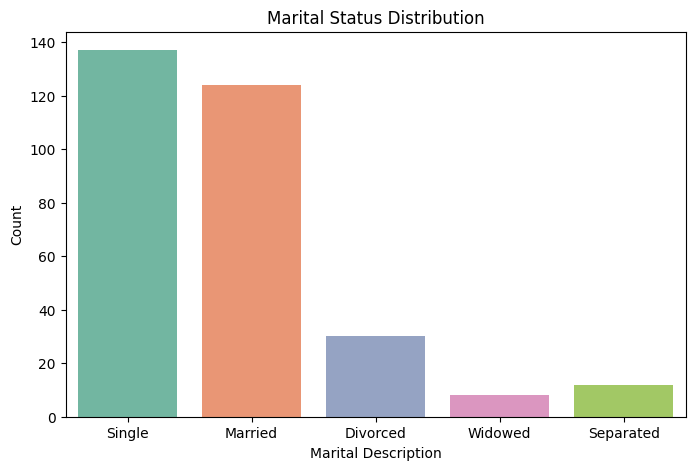

In [ ]:
# Create a countplot for marital status distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='MaritalDesc', palette='Set2')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Description')
plt.ylabel('Count')
plt.show()

**Analysis of Departments**

In [ ]:
gender_distribution_pivot = gender_distribution_by_department.pivot(index='Department', columns='Sex', values='Employee_Count')
gender_distribution_pivot = gender_distribution_pivot.fillna(0)
print('\nGender Distribution by Department')
print(gender_distribution_pivot)



Gender Distribution by Department
Sex                       F    M 
Department                       
Admin Offices           6.0   3.0
Executive Office        1.0   0.0
IT/IS                  22.0  28.0
Production            126.0  83.0
Sales                  15.0  16.0
Software Engineering    6.0   5.0


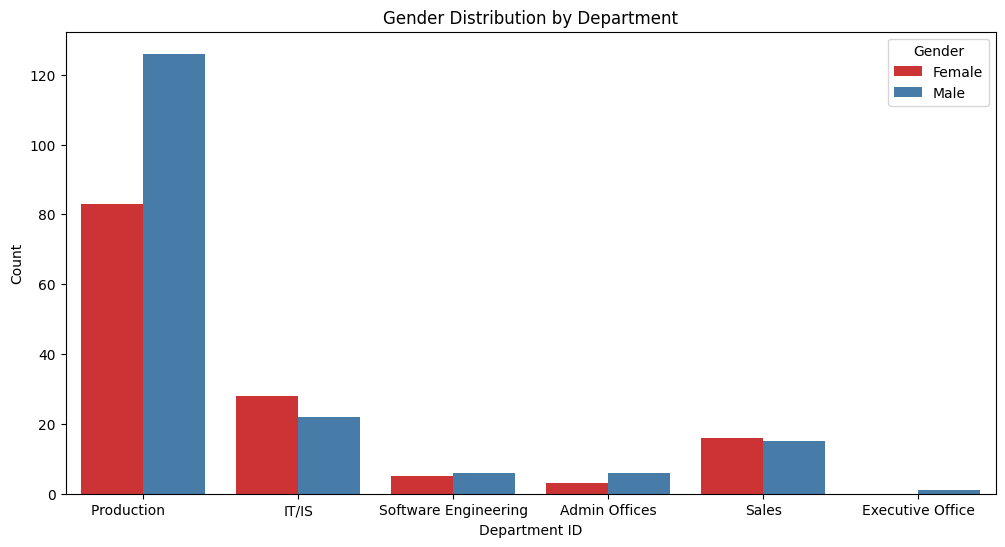

In [ ]:

# Create a countplot for Gender distribution by department
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Department', hue='Sex', palette='Set1')
plt.title('Gender Distribution by Department')
plt.xlabel('Department ID')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

In [ ]:
department_employee_counts = df.groupby('Department')['Employee_Name'].count().reset_index()
department_employee_counts.columns = ['Department', 'Employee_Count']
department_employee_counts = department_employee_counts.sort_values(by='Employee_Count', ascending=False)
print(department_employee_counts)

             Department  Employee_Count
3     Production                    209
2                 IT/IS              50
4                 Sales              31
5  Software Engineering              11
0         Admin Offices               9
1      Executive Office               1


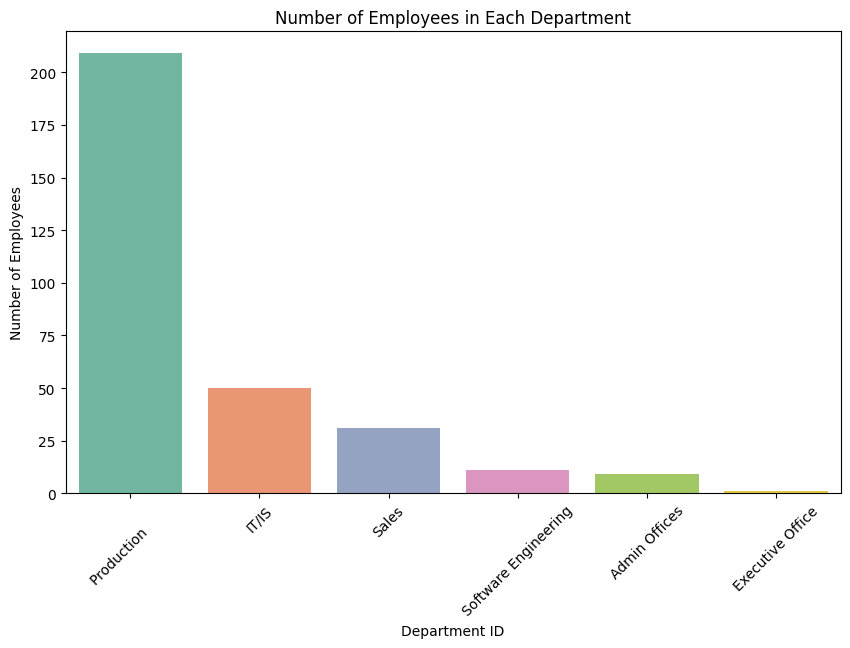

In [ ]:

# Count the number of employees in each department
department_counts = df['Department'].value_counts().reset_index()
department_counts.columns = ['Department ID', 'Number of Employees']

# Create a bar plot for the number of employees in each department
plt.figure(figsize=(10, 6))
sns.barplot(data=department_counts, x='Department ID', y='Number of Employees', palette='Set2')
plt.title('Number of Employees in Each Department')
plt.xlabel('Department ID')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Group the data by department and calculate summary statistics for salary
department_salary_stats = df.groupby('Department')['Salary'].describe()

# Display the summary statistics for salary by department
print(department_salary_stats)

                      count           mean           std       min        25%  \
Department                                                                      
Admin Offices           9.0   71791.888889  21706.397164   49920.0   55000.00   
Executive Office        1.0  250000.000000           NaN  250000.0  250000.00   
IT/IS                  50.0   97064.640000  33209.612190   50178.0   77417.75   
Production            209.0   59953.545455  11422.656822   45046.0   53018.00   
Sales                  31.0   69061.258065  21271.393236   55875.0   61561.50   
Software Engineering   11.0   94989.454545   9566.505698   77692.0   89601.50   

                           50%       75%       max  
Department                                          
Admin Offices          63003.0   93046.0  106367.0  
Executive Office      250000.0  250000.0  250000.0  
IT/IS                  92328.5  106844.5  220450.0  
Production             59472.0   64066.0  170500.0  
Sales                  65310.0   

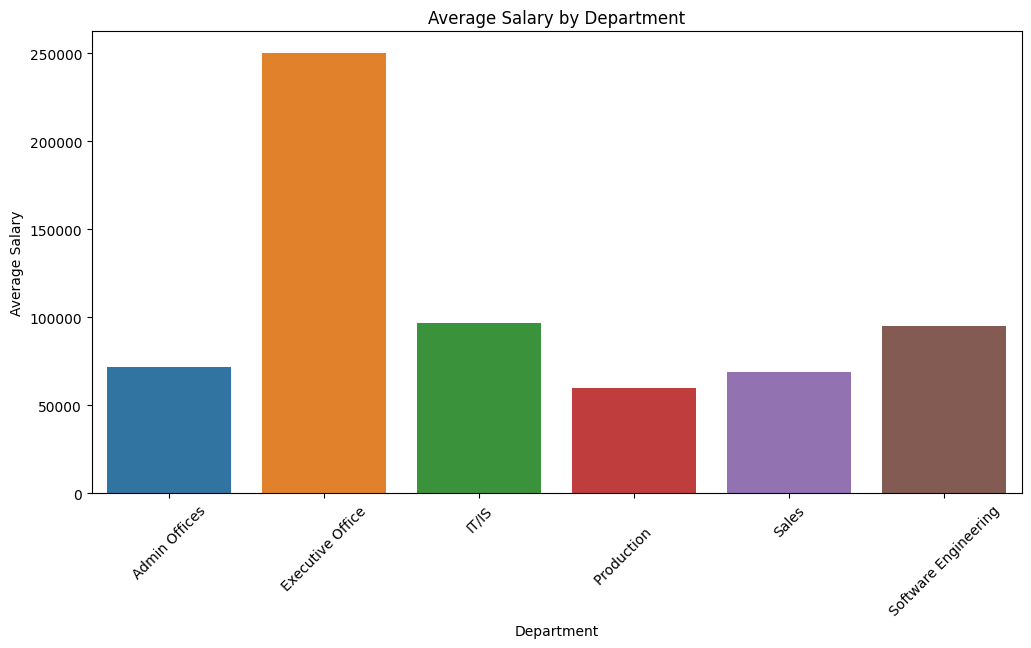

In [ ]:
# Calculate the average salary by department
department_avg_salary = df.groupby('Department')['Salary'].mean().reset_index()

# Create a bar plot for average salary by department
plt.figure(figsize=(12, 6))
sns.barplot(data=department_avg_salary, x='Department', y='Salary')
plt.title('Average Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

In [ ]:
unique_performance_scores = df['PerformanceScore'].unique()
print(unique_performance_scores)

['Exceeds' 'Fully Meets' 'Needs Improvement' 'PIP']


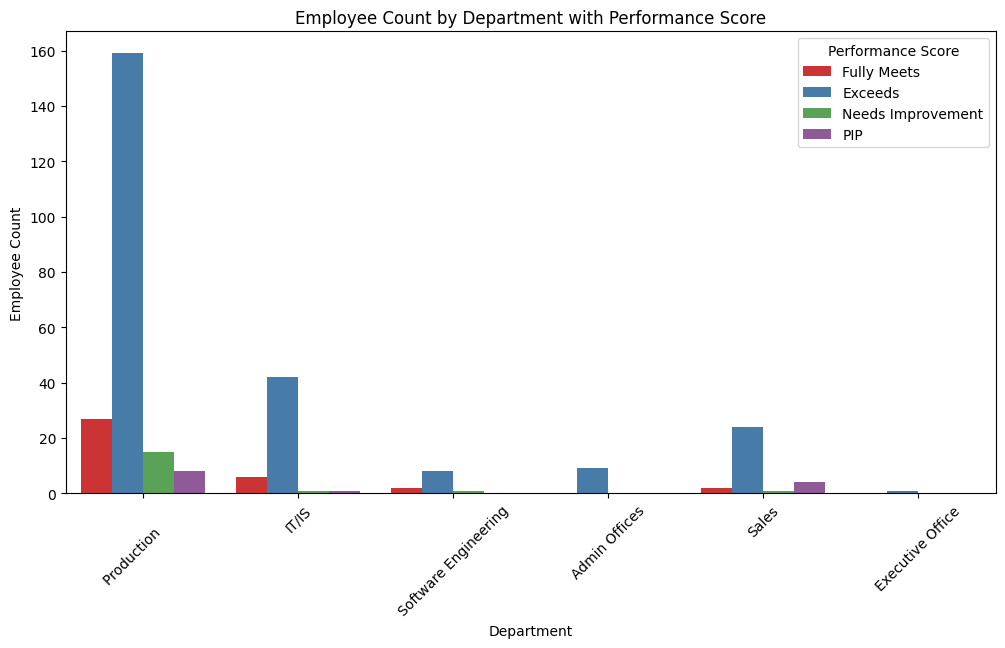

In [ ]:
# Create a countplot to show employee count by department with performance score as hue
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Department', hue='PerformanceScore', palette='Set1')
plt.title('Employee Count by Department with Performance Score')
plt.xlabel('Department')
plt.ylabel('Employee Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Performance Score', labels=['Fully Meets', 'Exceeds', 'Needs Improvement', 'PIP'])
plt.show()